### Линейная алгебра. Лабораторная работа 1, зима 2025, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

import sympy as sp

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
# нулевая матрица Z размера (3 x 4)
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# диагональная матрица (5 x 5) с диагональными элементами 1, 2, 3, 4 и 5;
D = np.diag([1, 2, 3, 4, 5])
print(D)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [6]:
# её след 
print(np.trace(D))

15


In [7]:
# обратная к ней матрица;
InvD = sla.inv(D)
print(InvD)

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [8]:
# случайная матрица X (4 x 5)
X = np.random.rand(4, 5)
print(X)

[[0.98272515 0.92154699 0.68159216 0.4476014  0.87726422]
 [0.57894495 0.01541403 0.81742044 0.50501425 0.06039143]
 [0.13069749 0.74562852 0.50686136 0.2312382  0.17264542]
 [0.04754795 0.62018741 0.44990913 0.77331729 0.08849466]]


In [9]:
# определитель подматрицы матрицы X, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца
DetXM = sla.det(X[np.ix_([1, 2], [0, 1])])
print(DetXM)

0.429663292110949


In [10]:
# найдите произведение X^T * X
prodXT_X = np.dot(X.T, X)
print(prodXT_X)

[[1.32026861 1.0414917  1.23069696 0.79923651 0.92384499]
 [1.0414917  1.79008077 1.29767722 1.07228948 0.9929837 ]
 [1.23069696 1.29767722 1.59207072 1.18301879 0.77462345]
 [0.79923651 1.07228948 1.18301879 1.10687714 0.5315199 ]
 [0.92384499 0.9929837  0.77462345 0.5315199  0.81087738]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [11]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    n = X.shape[0]
    m = X.shape[1]
    X = X.astype(np.float64)

    if (n != m):
        raise ValueError("Matrix should be square")
    flag = 0
    for i in range(n):
        # Найдем первый неноль в строке
        for j in range(i, n):
            if (X[j, i] != 0):
                X[[i, j]] = X[[j, i]]
                flag ^= (i != j)
                break
        if (X[i, i] == 0):
            return 0
        # Занулим все элементы под нулем с помощью ЭП
        for j in range(i + 1, n):
            X[j] -= X[i] * (X[j, i] / X[i, i])
    

    return np.prod(np.diag(X)) * (-1 if flag else 1)

Простая проверка:

In [12]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [13]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

51.7 μs ± 20.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
595 μs ± 193 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
464 μs ± 167 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
31.3 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.8 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


3.4 s ± 951 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


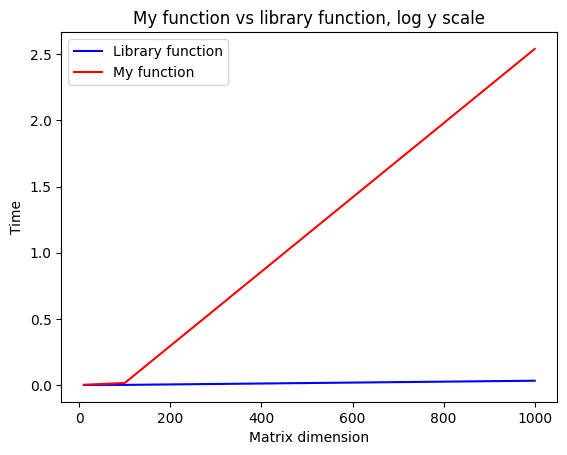

In [14]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

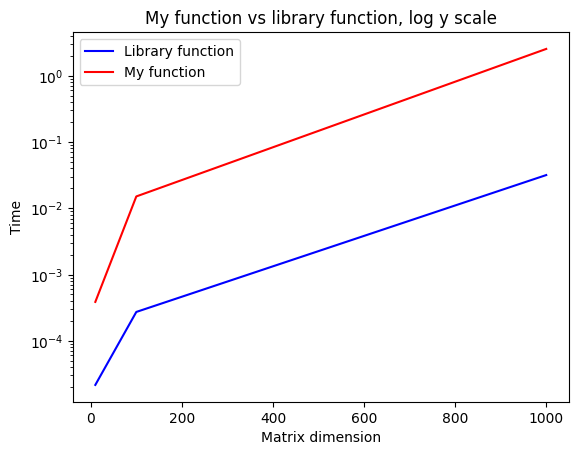

In [15]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [16]:
A = np.array([[1,0], [10**20,1]])
B = np.array([[10**(-20),1], [0,1 - 10**20]])
AF = np.array([[1.,0.], [10.**20,1.]])
BF = np.array([[10.**(-20),1.], [0.,1. - 10.**20]])
M = np.dot(A, B) 
print(M)
MF = np.dot(AF, BF)
x = 3.14159
print(MF)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

Тот, где используется целочисленная арифметика, так как, например, значение $(A*B)_{2,2} = 10^{20} + 1 - 10^{20} = 1$
Там где считается в числах с плавающей запятой, то из-за точности получили 0.

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [17]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))

    # P[i][j] = C[i][i+j] = C[i-1][i+j-1] + C[i][i+j-1] ->
    # P[i][j] = P[i-1][j] + P[i][j-1]

    # первая строка и первый столбец единицы:
    for i in range(dim):
        P[i, 0] = 1
        P[0, i] = 1

    # остальные по формуле
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i-1, j] + P[i, j-1]

    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Докажем по индукции (по n), что определитель равен 1.

База: n = 1, очев, что ответ 1(матрица 1 на 1).

Переход: пусть $det(P(n, n)) = 1 \rightarrow det(P(n + 1, n + 1)) = 1$.

Док-во: Для каждого $k \in [2, n + 1]$(в порядке убывания $k$) отнимем от $k$-ой строки $(k-1)$-ую строку. Так как $P_{ij} = P_{(i-1)j} + P_{i(j-1)}$, то получим, что $P'_{ij} = P_{i(j-1)}$, где $P'$-матрица после преобразований. И $P'_{i0} = 0$ (для $i \geq 2$). Таким образом, так как во всем первом столбце нули кроме первой строки, то произведение будет ненулевым, если первым элементом взять $(1, 1)$. После чего получили случай $P(n, n)$.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [18]:
print(sla.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [19]:
def prod_and_sq_sum(A):
    '''
    Parameters
    ----------
    A : matrix, shape (n, n), ndarray
    
    Returns
    -------
    (product, sum_sq) : tuple of floats,
        product - the product of the diagonal elements of A
        sum_sq - the sum of squares of the diagonal elements of A
    '''
    diag = np.diag(A)
    product = np.prod(diag)
    sum_sq = np.sum(diag ** 2)
    return product, sum_sq

In [20]:
def bad_prod_and_sq_sum(A):
    '''
    This function is used only for testing.
    '''
    n = len(A)
    prod = 1
    sq_sum = 0
    for i in range(n):
        diag = A[i][i]
        prod *= diag
        sq_sum += diag * diag
    return prod, sq_sum

def test(cnt_tests):
    for _ in range(cnt_tests):
        n = np.random.randint(1, 100)
        A = np.random.rand(n, n)

        if np.any(np.abs(np.array(prod_and_sq_sum(A)) - np.array(bad_prod_and_sq_sum(A))) > 1e-6):
            print('FAILED')

test(100)

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}a_ib_i^T$$

In [21]:
def f(A, B, k):
    """
    Computes the sum of outer products of the columns:
       Sum_{i=1}^{min(k, n)} a_i * b_i^T,
    where a_i and b_i are the i-th columns of matrices A and B.

    Parameters:
      A : numpy.array of shape (m, n)
      B : numpy.array of shape (m, n)
      k : integer

    Returns:
      numpy.array of shape (m, m) equal to formula above.
    """
    n = A.shape[1]
    k = min(k, n)
    return np.dot(A[:, :k], B[:, :k].T)

In [22]:
def bad_f(A, B, k):
    '''
    This function is used only for testing.
    '''
    m, n = A.shape
    result = np.zeros((m, m))
    q = min(k, n)
    for i in range(q):
        # Достанем столбцы
        a_i = A[:, i]
        b_i = B[:, i]
        # a_i * b_i^T
        result += np.outer(a_i, b_i)
    return result


def test(cnt_tests):
    for _ in range(cnt_tests):
        n = np.random.randint(1, 100)
        m = np.random.randint(1, 100)
        A = np.random.rand(m, n)
        B = np.random.rand(m, n)
        k = int(np.random.randint(1, 200, 1))

        if np.any(np.abs(f(A, B, k) - bad_f(A, B, k)) > 1e-6):
            print('FAILED')

test(100)

/var/folders/l4/2y8c0j1d7c7g1xtmkvv06f4c0000gn/T/ipykernel_57126/2246172396.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = int(np.random.randint(1, 200, 1))


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [23]:
def get_diag(A, B):
    """
    Returns a vector of the diagonal elements of the matrix product AB 
    without computing the full product.

    Parameters:
      A : numpy.array of shape (n, n)
      B : numpy.array of shape (n, n)

    Returns:
      numpy.array of shape (n,n) containing the diagonal elements of AB.
    """
    return np.sum(A * B.T, axis=1)

In [24]:
def bad_get_diag(A, B):
    '''
    This function is used only for testing.
    '''
    return np.diag(np.dot(A, B))

def test(cnt_tests):
    for _ in range(cnt_tests):
        n = np.random.randint(1, 100)
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)

        if np.any(np.abs(np.array(get_diag(A, B)) - np.array(bad_get_diag(A, B))) > 1e-6):
            print('FAILED')

test(100)

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [25]:
def shrink_rotate(x, a, coef=1., angle=0.):
    """
    Applies a shrink-rotate transformation:

    Parameters:
      	x : complex, input point X.
      	a : complex, center of transformation.
      	coef : float, scaling factor.
      	angle : float, rotation angle in radians.

    Returns:
    	complex, the transformed point.
    """
    # воспользуемся тригонометрической формой комплексного числа,
	# тогда умножение на e^(angle * i) - поворот на угол angle
    return a + (x - a) * coef * np.exp(1j * angle)


def shrink_rotate_conj(x, a, coef=1., angle=0.):
    """
    First applies the shrink_rotate transformation to x relative to a,
    obtaining a point Y. Then reflects the vector AY across the horizontal line
    through A.

    Parameters:
      	x : complex, input point.
      	a : complex, center of transformation.
      	coef : float, scaling factor.
      	angle : float, rotation angle in radians.

    Returns:
      	complex, the final transformed point.
    """
    y = shrink_rotate(x, a, coef, angle)
    return a + (y - a).conjugate()


def geometric_inverse(x, a, r):
    """
    Computes the inversion of point x with respect to the circle centered at a with radius r.

    Parameters:
      	x : complex, input point.
      	a : complex, center of inversion.
      	r : positive float, radius of the inversion circle.

    Returns:
      	complex, the inverted point.
    """

    # |x - a| * |x' - a| = r^2 -> 
	# |x' - a| = r^2 / |x - a| -> 
	# x' - a = (x - a) * r^2 / |x - a|^2 ->
	# x' = a + (x - a) * r^2 / |x - a|^2 ->
    # x' = a + (x - a) * r^2 / z*z'

    return a + (x - a) * (r ** 2) / ((x - a) * (x - a).conjugate())


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

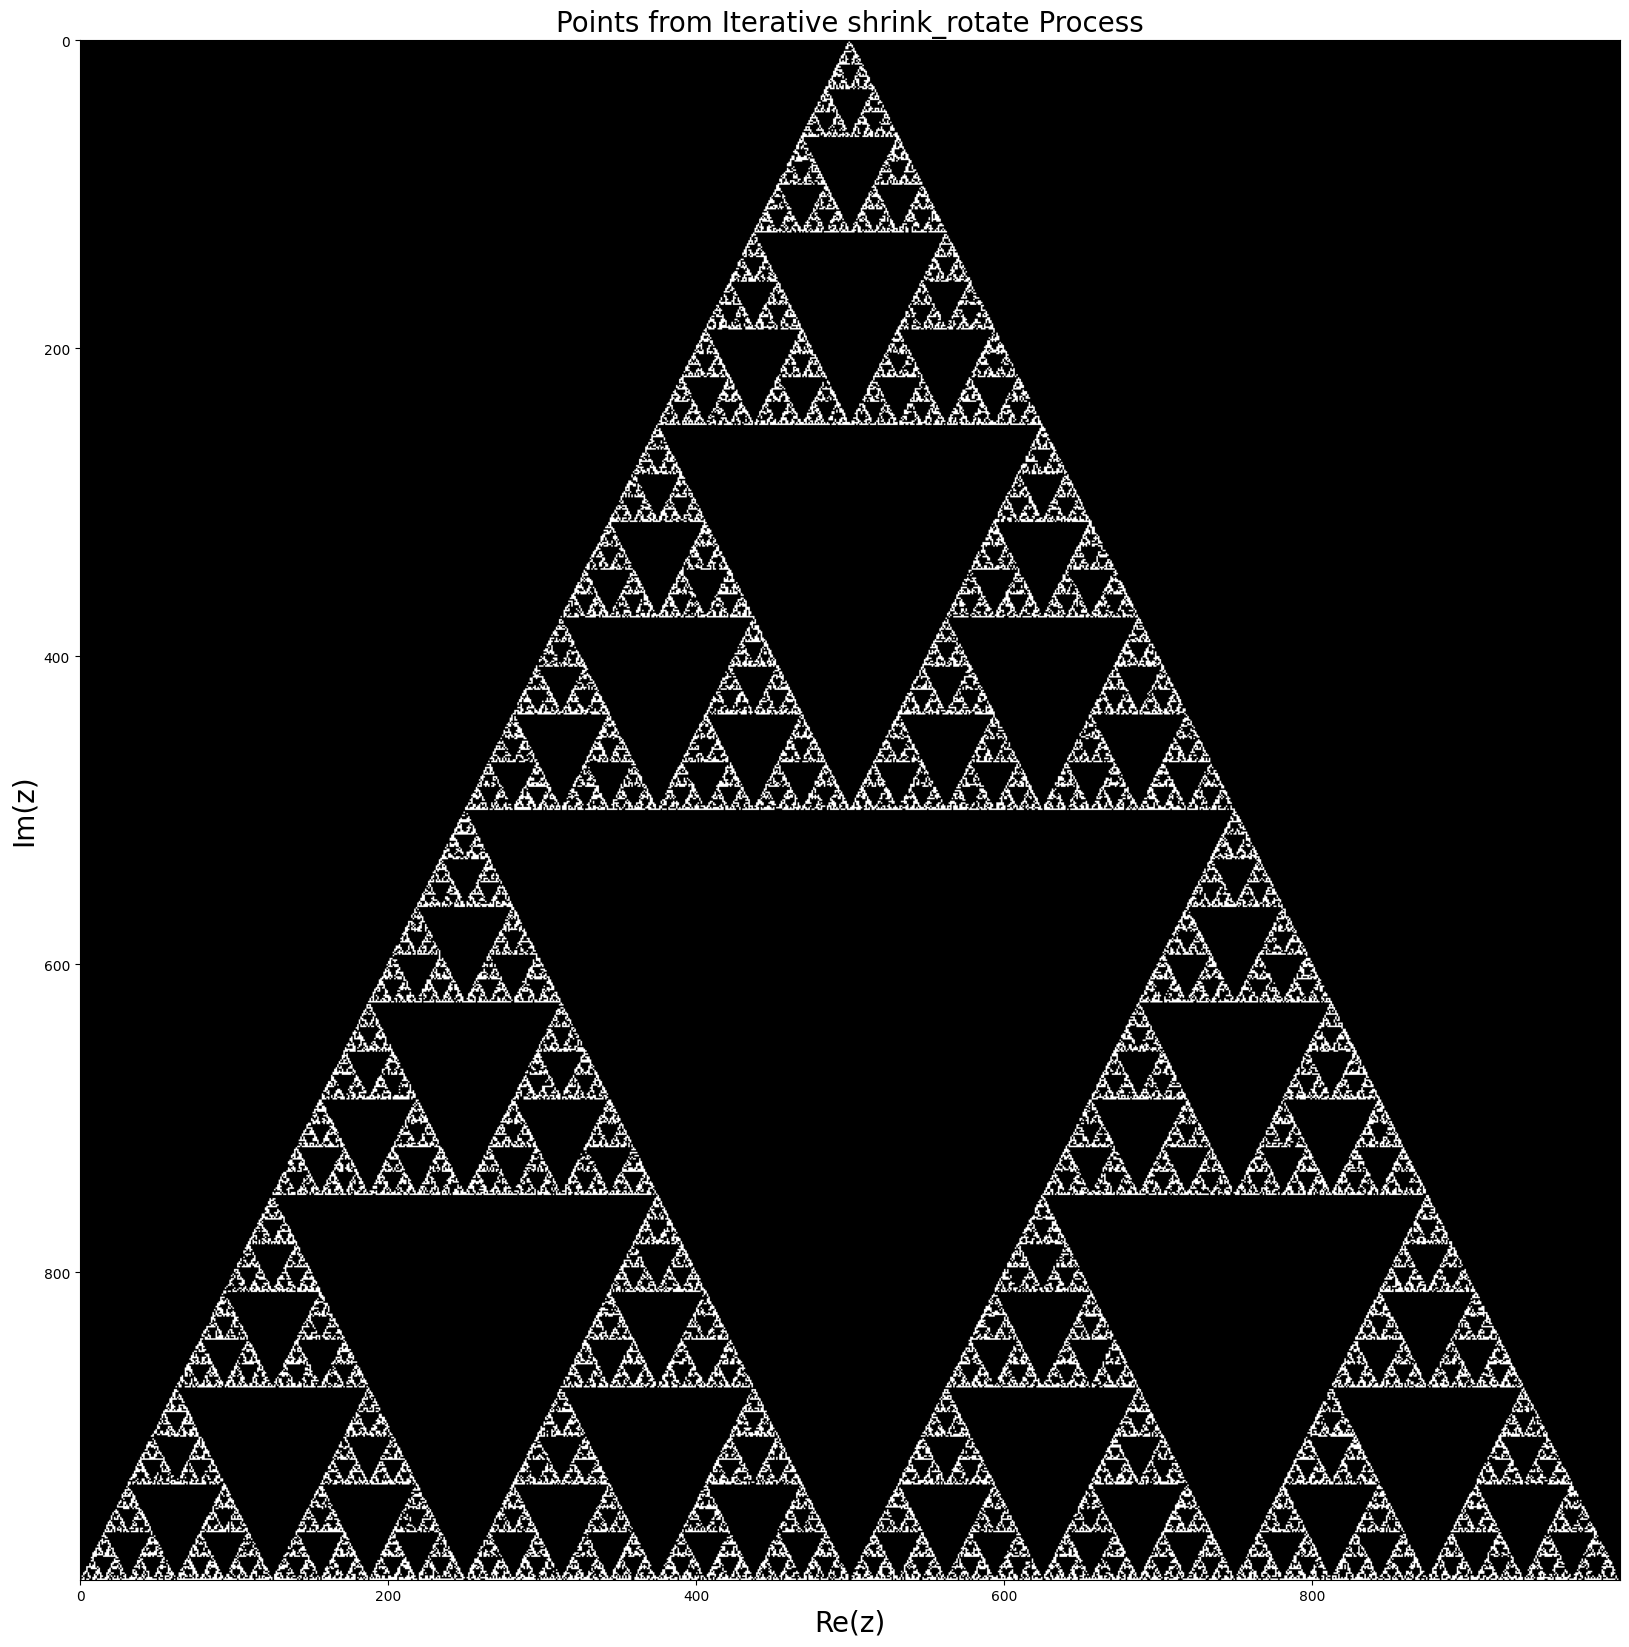

In [26]:
# Process parameters
z = 0.5 + 0j
max_iter = 100000
funcs = [
    lambda t: shrink_rotate(t, 0 + 1j, coef=0.5, angle=0.),
    lambda t: shrink_rotate(t, 1 + 0j, coef=0.5, angle=0.),
    lambda t: shrink_rotate(t, -1 + 0j, coef=0.5, angle=0.)
]

img_size = 1000
img = np.zeros((img_size, img_size))

def z_to_pixel(z, img_size):
    col = int((z.real + 1) / 2 * img_size)
    row = int((1 - z.imag) * img_size)
    return row, col

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        row, col = z_to_pixel(z, img_size)
        img[row, col] = 1

# Plot the result (fractal-like set)
plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')
plt.title('Points from Iterative shrink_rotate Process', fontsize=20)
plt.xlabel('Re(z)', fontsize=20)
plt.ylabel('Im(z)', fontsize=20)
plt.show()

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

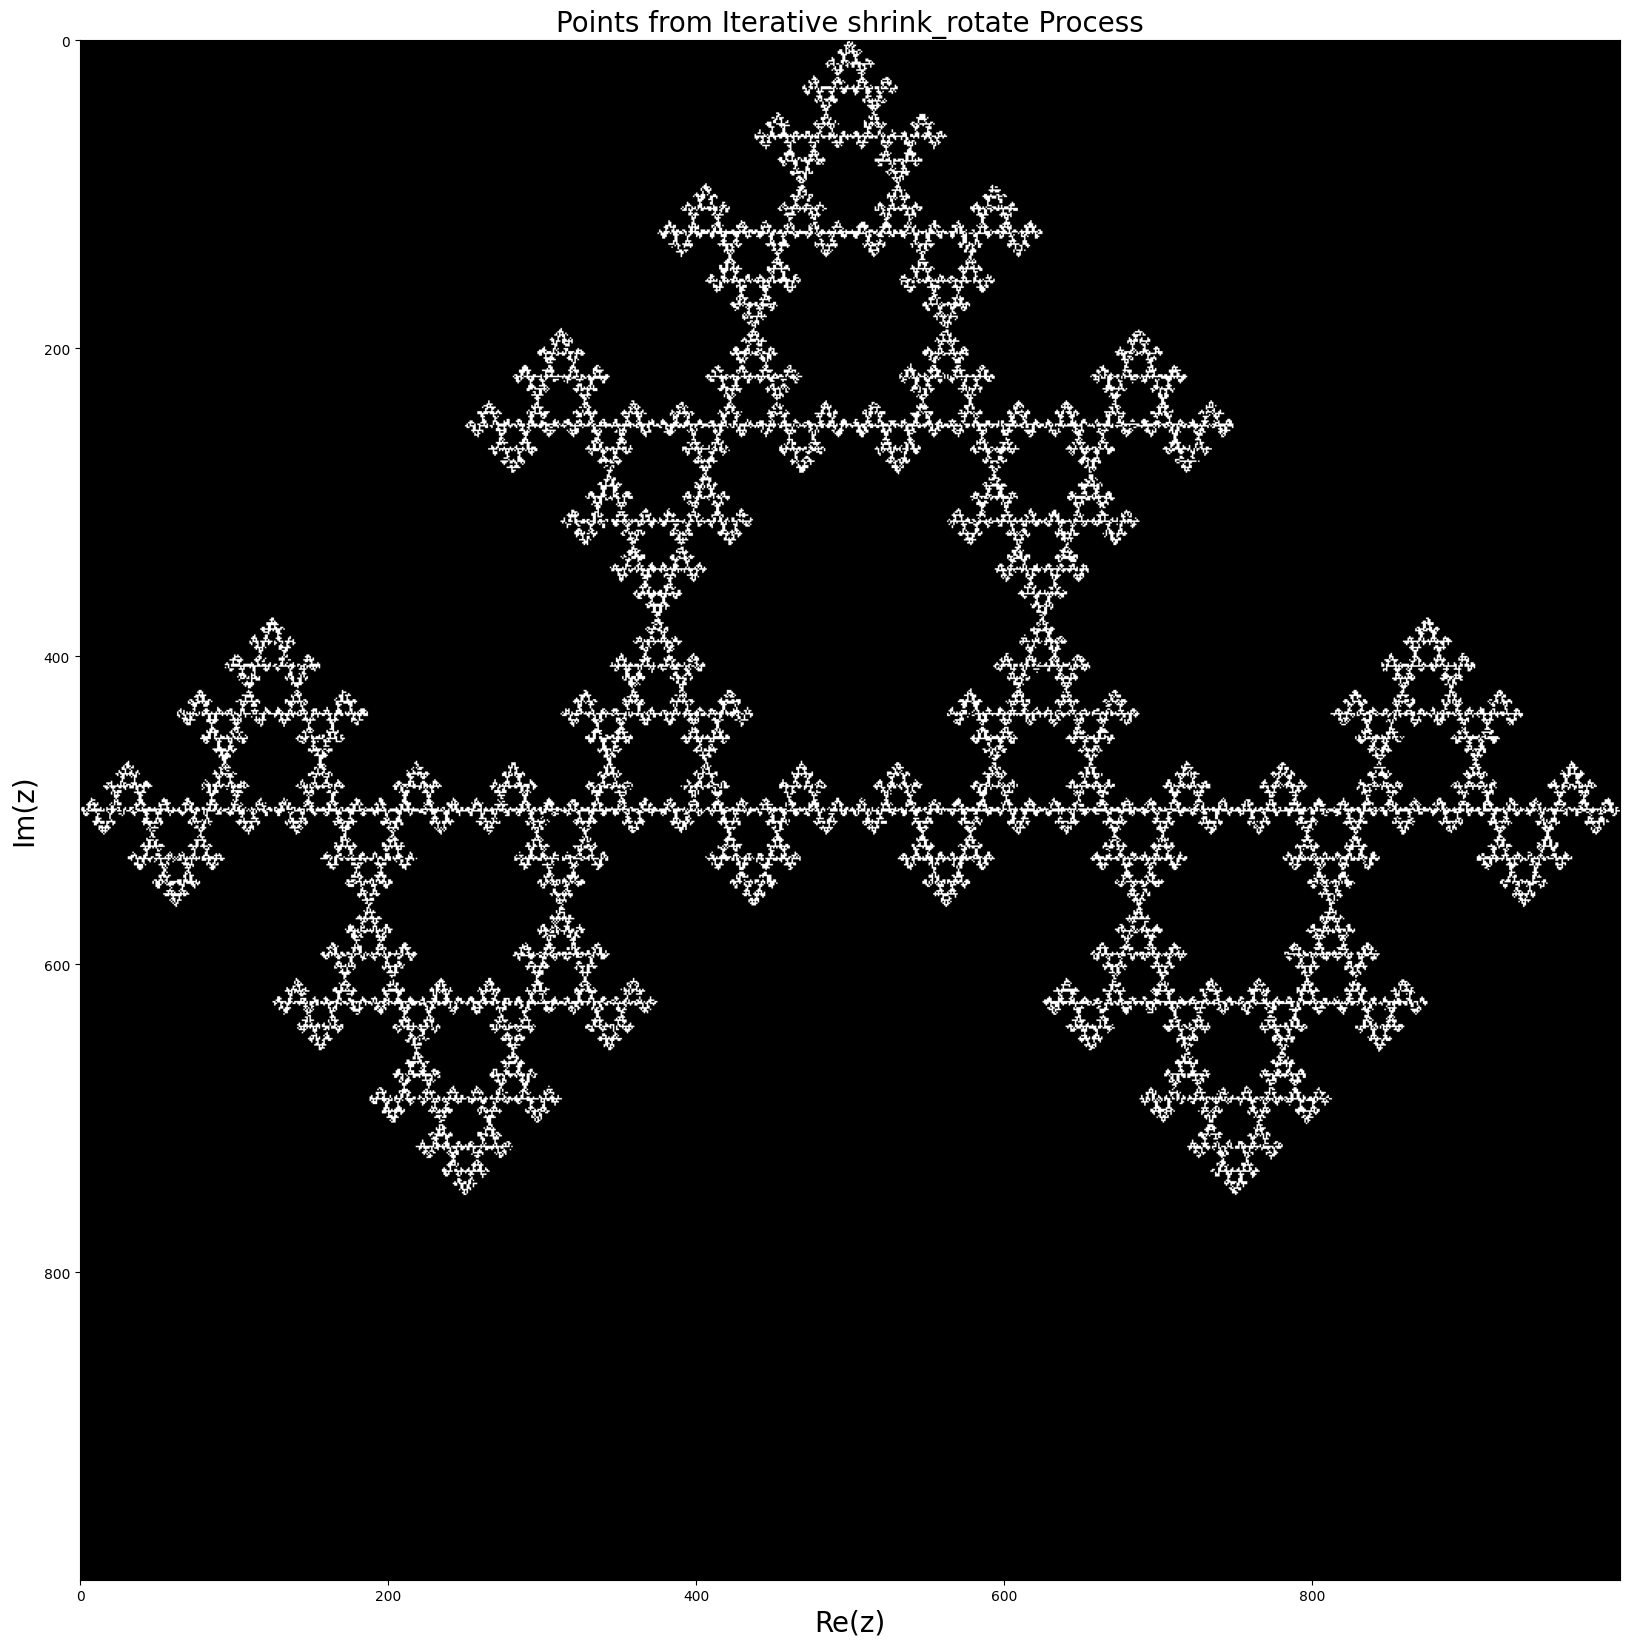

In [27]:
# Process parameters
z = np.random.rand() + 1j * np.random.rand()
# print(z)
max_iter = 100000
funcs = [
    lambda t: shrink_rotate(t, 0 + 1j, coef=0.5, angle=0),
    lambda t: shrink_rotate(t, 1 + 0j, coef=0.5, angle=np.pi),
    lambda t: shrink_rotate(t, -1 + 0j, coef=0.5, angle=np.pi)
]

img_size = 1000
img = np.zeros((img_size, img_size))

def z_to_pixel(z, img_size):
	col = int((z.real + 3) / 6 * img_size)
	row = int((1 - z.imag) / 2 * img_size)
	row = np.clip(row, 0, img_size - 1)
	col = np.clip(col, 0, img_size - 1)
	return row, col

# max_z = 0
# min_z = 0

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    
    # max_z = max(max_z, np.abs(z))
    # min_z = min(min_z, np.abs(z))
    
    if n_iter >= 100:
        row, col = z_to_pixel(z, img_size)
        img[row, col] = 1
        
# print(max_z, min_z)

# Plot the result (fractal-like set)
plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')
plt.title('Points from Iterative shrink_rotate Process', fontsize=20)
plt.xlabel('Re(z)', fontsize=20)
plt.ylabel('Im(z)', fontsize=20)
plt.show()

## Часть 6. Функции от матриц

### Пусть $A$ -- некоторая квадратная матрица.

В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать разными способами. Ниже мы покажем два из них, один символьный и один численный.

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 241:

`A = Matrix([[4,4,4,1],[5,7,6,2],[-8,-6,-6,-3],[-1,-6,-5,1]])`

- у группы 242:

`A = Matrix([[-1,1,1,1],[-3,2,1,2],[-2,3,3,-2],[-2,1,1,2]])`

- у группы 243:

`A = Matrix([[2,1,-3,-2],[1,2,2,1],[2,-2,8,3],[-2,4,-8,-2]])`

- у группы 244:

`A = Matrix([[-3,3,-2,1],[-7,6,-5,4],[-2,1,-4,6],[-2,1,-5,7]])`

- у группы 245:

`A = Matrix([[4,3,3,1],[-7,-7,-8,-3],[2,3,5,1],[6,7,6,4]])`
 
В этом задании надо пользоваться [библиотекой](https://www.sympy.org/) `sympy` для символьных вычислений. Вам понадобятся:
- [sympy.symbol](https://docs.sympy.org/latest/modules/core.html#module-sympy.core.symbol) для генерации буквенных выражений.
- Для работы с многочленами смотреть [сюда](https://docs.sympy.org/latest/modules/polys/basics.html#polynomials).
- Для работы с символьными матрицами [сюда](https://docs.sympy.org/latest/modules/matrices/index.html).

Посчитайте указанным способом (все вычисления должны быть символьными):
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. Но я настоятельно рекомендую использовать `sympy`.

In [28]:
x = sp.symbols('x')
A = sp.Matrix([
    [-1,  1,  1,  1],
    [-3,  2,  1,  2],
    [-2,  3,  3, -2],
    [-2,  1,  1,  2]
])

# print("Matrix A:")
# sp.pprint(A)
# print()

# 1) хар многочлен f(x) матрицы A
f = A.charpoly(x)
print("charpoly f(x):")
sp.pprint(f.as_expr())
print()

# 2) разложение f(x) на множители и нахождение корней
factors = sp.factor_list(f.as_expr())[1]
eigs = []
for factor, mult in factors:
    if sp.degree(factor, x) == 1:
        lam = sp.solve(factor, x)[0]
        eigs.append((lam, mult))
eigs.sort(key=lambda t: t[0])
print("Собственные значения:")
for lam, mult in eigs:
    print("lambda =", lam, "cnt =", mult)
print()

# 3) эрмитовая интерполяция (с лабы матана ООО ЕС)
def hermite_interpolation_polynomial(phi, nodes, x_sym):
    """
    Строит многочлен Эрмита в форме Нютона по узлам nodes,
    где nodes — список узлов (с повторениями), а phi — заданное выражение от x.
    """
    n = len(nodes)
    # таблица разделённых разностей
    Q = [[0]*n for _ in range(n)]
    for i in range(n):
        Q[i][0] = sp.simplify(phi.subs(x, nodes[i]))

    for i in range(1, n):
        if sp.Eq(nodes[i], nodes[i-1]):
            Q[i][1] = sp.simplify(sp.diff(phi, x, 1).subs(x, nodes[i]))
        else:
            Q[i][1] = sp.simplify((Q[i][0] - Q[i-1][0])/(nodes[i] - nodes[i-1]))

    for i in range(2, n):
        for j in range(2, i+1):
            if sp.Eq(nodes[i], nodes[i-j]):
                Q[i][j] = sp.simplify(sp.diff(phi, x, j).subs(x, nodes[i]) / sp.factorial(j))
            else:
                Q[i][j] = sp.simplify((Q[i][j-1] - Q[i-1][j-1])/(nodes[i] - nodes[i-j]))

    # Строим многочлен в форме Нютона:
    poly = Q[0][0]
    term = 1
    for i in range(1, n):
        term *= (x_sym - nodes[i-1])
        poly += Q[i][i] * term
    return sp.expand(poly)

def hermite_poly(phi):
    nodes = []
    sorted_eigs = sorted(eigs, key=lambda t: t[0])
    for ev, mult in sorted_eigs:
        nodes.extend([ev]*mult)
    return hermite_interpolation_polynomial(phi, nodes, x)

# функция для вычисления многочлена от матрицы 
def matrix_poly_eval(poly_expr, A):
    p = sp.Poly(poly_expr, x)
    coeffs = p.all_coeffs()  # коэффициенты в порядке убывания степени
    result = coeffs[0] * sp.eye(A.shape[0])
    for coeff in coeffs[1:]:
        result = result * A + coeff * sp.eye(A.shape[0])
    return sp.simplify(result)


# 1) B = exp(A)
phi_exp = sp.exp(x)
g_exp = hermite_poly(phi_exp)
B_interpolated = matrix_poly_eval(g_exp, A)
# print("Полином Эрмита для exp(x):")
# sp.pprint(g_exp)
# print()
# print("Матрица B = exp(A):")
# sp.pprint(B_interpolated)
# print()


# 2) S = sin(A)
phi_sin = sp.sin(x)
g_sin = hermite_poly(phi_sin)
S_interpolated = matrix_poly_eval(g_sin, A)
# print("Полином Эрмита для sin(x):")
# sp.pprint(g_sin)
# print()
# print("Матрица S = sin(A):")
# sp.pprint(S_interpolated)
# print()


# 3) T = cos(A) через g_cos(A)
phi_cos = sp.cos(x)
g_cos = hermite_poly(phi_cos)
T_interpolated = matrix_poly_eval(g_cos, A)
# print("Полином Эрмита для cos(x):")
# sp.pprint(g_cos)
# print()
# print("Матрица T = cos(A):")
# sp.pprint(T_interpolated)
# print()


# 4) Проверка sin^2(A) + cos^2(A) = E
E = sp.eye(A.shape[0])
expr = sp.simplify(S_interpolated**2 + T_interpolated**2)
print("S^2 + T^2:")
sp.pprint(expr)
print("\nРавенство с E? ->", expr.equals(E))
print()


# 5) ln(B) и проверка, что ln(B) = A
# charpoly для матрицы B
g = B_interpolated.charpoly(x)
print("charpoly g(x):")
sp.pprint(g.as_expr())
print()

factors_B = sp.factor_list(g.as_expr())[1]
eigs_B = []
for factor, mult in factors_B:
    if sp.degree(factor, x) == 1:
        lam = sp.solve(factor, x)[0]
        eigs_B.append((lam, mult))
eigs_B.sort(key=lambda t: t[0])
eigs = eigs_B
print("Собственные значения:")
for lam, mult in eigs:
    print("lambda =", lam, "cnt =", mult)
print()

phi_ln = sp.ln(x)
g_ln = hermite_poly(phi_ln)
LnB_interpolated = matrix_poly_eval(g_ln, B_interpolated)
# print("Полином Эрмита для ln(x):")
# sp.pprint(g_ln)
# print()
print("Матрица ln(B):")
sp.pprint(LnB_interpolated)
print()

print("\nРавенство ln(B) = A? ->", LnB_interpolated.equals(A))


charpoly f(x):
 4      3       2           
x  - 6⋅x  + 13⋅x  - 12⋅x + 4

Собственные значения:
lambda = 1 cnt = 2
lambda = 2 cnt = 2

S^2 + T^2:
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

Равенство с E? -> True

charpoly g(x):
 4    3 ⎛     2      ⎞    2 ⎛ 2    4      3⎞     ⎛     5      4⎞    6
x  + x ⋅⎝- 2⋅ℯ  - 2⋅ℯ⎠ + x ⋅⎝ℯ  + ℯ  + 4⋅ℯ ⎠ + x⋅⎝- 2⋅ℯ  - 2⋅ℯ ⎠ + ℯ 

Собственные значения:
lambda = E cnt = 2
lambda = exp(2) cnt = 2

Матрица ln(B):
⎡-1  1  1  1 ⎤
⎢            ⎥
⎢-3  2  1  2 ⎥
⎢            ⎥
⎢-2  3  3  -2⎥
⎢            ⎥
⎣-2  1  1  2 ⎦


Равенство ln(B) = A? -> True


Теперь попробуем поиграться с матрицами по-другому. В этом задании уже требуется работать с матрицами численно. Для этого используйте `numpy` или `scipy`.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [29]:
A = np.array([
    [-1, 1, 1, 1],
    [-3, 2, 1, 2],
    [-2, 3, 3, -2],
    [-2, 1, 1, 2]
], dtype=float)

# точность
eps = 1e-12

# 1) 
n = A.shape[0]
E = np.eye(n)
expA = E.copy() # сумма ряда
temp = E.copy() # текущее слагаемое
k = 0

while True:
    k += 1
    temp = (A @ temp) / k
    expA += temp
    if np.max(np.abs(temp)) < eps:
        break

print("f(A) = e^A:")
print(expA)

# 2)
np.random.seed(0)
A_rand = np.random.rand(10, 10)

# ряд для cos(A)
S_cos = np.eye(10) # сумма ряда
temp = np.eye(10) # текущее слагаемое
k = 0
while True:
    k += 1
    temp = (temp @ A_rand @ A_rand) / ((2*k - 1) * (2*k))
    term = ((-1)**k) * temp
    S_cos += term
    if np.max(np.abs(term)) < eps:
        break

# вычислим ряд для sin(A)
S_sin = np.zeros((10, 10)) 
temp = A_rand.copy() # первое слагаемое sinA = A/1!
S_sin += temp
k = 0
while True:
    k += 1
    temp = (temp @ A_rand @ A_rand) / ((2*k) * (2*k + 1))
    term = ((-1)**k) * temp
    S_sin += term
    if np.max(np.abs(term)) < eps:
        break

left_side = (S_sin @ S_sin) + (S_cos @ S_cos)
E_10 = np.eye(10)

# Проверка разницы с единичной матрицей 
print("\nAbs error sinA^2 + cosA^2 - E:", np.max(np.abs(left_side - E_10)))

f(A) = e^A:
[[-1.01073379e+01  1.01073379e+01  7.38905610e+00  4.10238880e-14]
 [-1.55439016e+01  1.28256198e+01  7.38905610e+00  2.71828183e+00]
 [-1.67306046e+01  1.94488865e+01  1.47781122e+01 -1.01073379e+01]
 [-1.28256198e+01  1.01073379e+01  7.38905610e+00  2.71828183e+00]]

Abs error sinA^2 + cosA^2 - E: 1.7069679003611782e-15


## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
53.8 μs ± 22.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
95 μs ± 29.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
98.8 μs ± 17.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
264 μs ± 95 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The slowest run took 12.41 times longer than the fastest. This could mean that an intermediate result is being cached.
920 μs ± 806 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The slowest run took 8.30 times longer than the fastest. This could mean that an intermediate result is being cached.
2.52 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.93 ms ± 620 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.17 ms ± 944 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.32 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops 

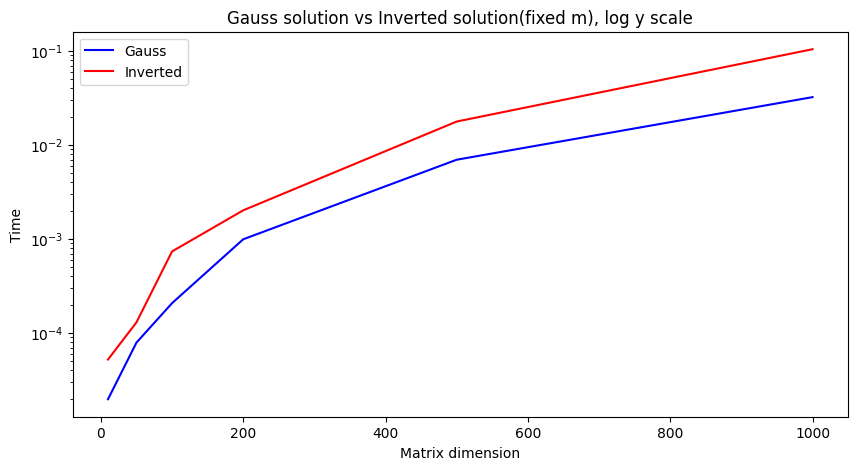

In [30]:
m = 10
gauss_times = []
inverted_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, m)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inverted = %timeit -o (sla.inv(A)).dot(B)
    inverted_times.append(res_inverted.best)

plt.figure(figsize=(10, 5))
plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution(fixed m), log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()
plt.show()

The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
293 μs ± 179 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
429 μs ± 61.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
391 μs ± 121 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
699 μs ± 228 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.03 ms ± 102 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.01 ms ± 135 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.25 ms ± 664 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.61 ms ± 171 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.13 ms ± 579 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.13 ms ± 763 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.6 ms ± 944 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.31 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.4 ms ± 6.67 ms p

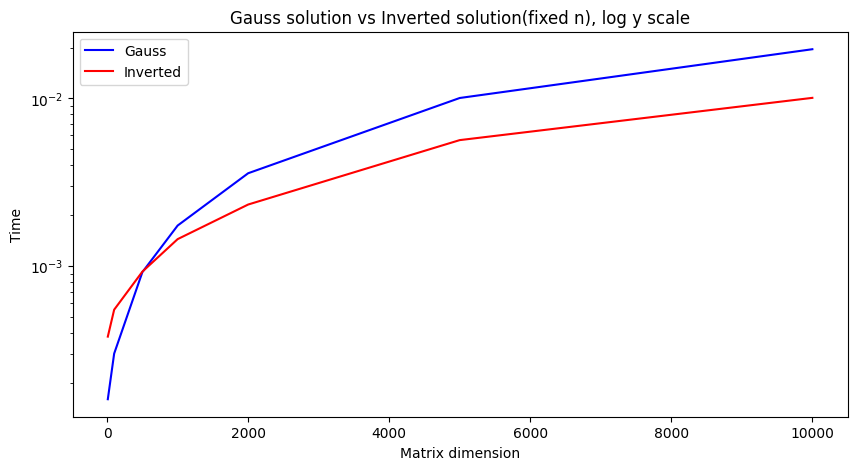

In [32]:
n = 100
gauss_times = []
inverted_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
for dim in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, dim)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inverted = %timeit -o (sla.inv(A)).dot(B)
    inverted_times.append(res_inverted.best)    

plt.figure(figsize=(10, 5))
plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution(fixed n), log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()
plt.show()

Вывод из графиков: **Метод Гаусса** медленнее, чем **через умножение на обратную**, когда $m > n$ ($\approx$ в 5-20 раз). Иначе метод немного гаусса выигрывает по скорости.

Обьясним формально:
Сложность через метод Гаусса, то есть получим матрицу размером $n \times (n + m)$. С семинара 2 знаем, что сложность алгоритма Гаусса на $m$ строках и $n$ столбцах равна $max(m,n)min(m,n)^2 − min(m,n)^3$ + $(\text{кол-во свободных})*m^2$. В нашем случае получим: 
$$
(n + m) \cdot n^2 - n^3 + (n + m) \cdot n^2 = O((n + m) \cdot n^2)
$$

Сложность через умножение на обратную, то есть получим матрицу размером $n \times n$, для которой надо обратную, посчитаем для нашего случая: $O(n^3)$. Тогда после умножение даст:
$$ O(n^3) + n^2 \cdot m = O(n^2 \cdot (n + m)) $$

Получили, что отличия только в констатах(ассимптотически они равны), поэтому ~~пора плакать~~ давайте считать, что обьяснение осталось для автора черной магией :3


